# Solutions 5 - Examples in Data Clustering

---

## Assignment 1

## Assignment 2

The letters are written in the file `files/Indore.jpg`. First, preprocessing is needed.

In [1]:
using Images, Colors, FixedPointNumbers

In [2]:
img=imread("files/Indore.jpg");

 in depwarn at deprecated.jl:73
 in imread at deprecated.jl:50
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at C:\Users\Ivan\.julia\v0.4\IJulia\src\execute_request.jl:183
 in eventloop at C:\Users\Ivan\.julia\v0.4\IJulia\src\IJulia.jl:143
 in anonymous at task.jl:447
while loading In[2], in expression starting on line 1


In [3]:
show(img), sizeof(img.data), typeof(img.data)

RGB Images.Image with:
  data: 480x800 Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: sRGB
    spatialorder:  x y

(nothing,1152000,Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2})

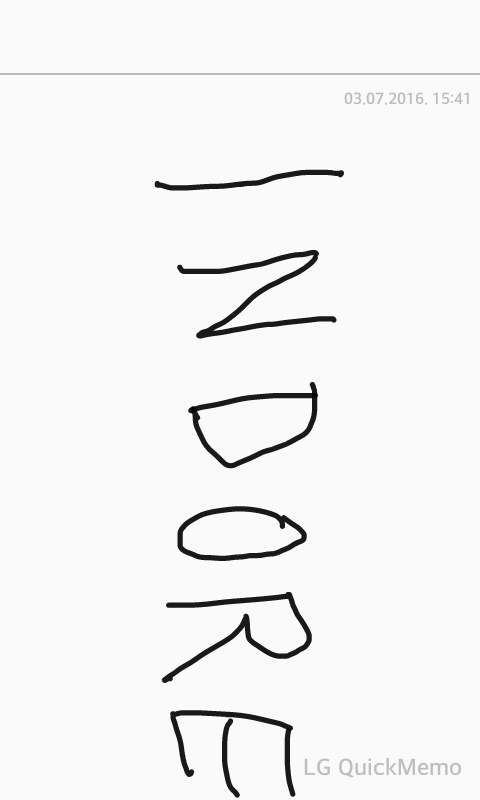

In [4]:
img=convert(Image{Gray},img)

In [5]:
show(img), sizeof(img.data), typeof(img.data)

Gray Images.Image with:
  data: 480x800 Array{ColorTypes.Gray{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: sRGB
    spatialorder:  x y

(nothing,384000,Array{ColorTypes.Gray{FixedPointNumbers.UFixed{UInt8,8}},2})

In [6]:
# Extract the matrix
imgsep=separate(img)
A=imgsep.data

800x480 Array{FixedPointNumbers.UFixed{UInt8,8},2}:
 0.98  0.98  0.98  0.98  0.98  0.98  …  0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98  …  0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98  …  0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  0.98  0.98  0.98     0.98  0.

In [7]:
sort(A[:])

384000-element Array{FixedPointNumbers.UFixed{UInt8,8},1}:
 0.008
 0.008
 0.008
 0.008
 0.008
 0.008
 0.012
 0.012
 0.012
 0.012
 0.012
 0.012
 0.012
 ⋮    
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984
 0.984

In [8]:
# Truncate the small elements
A[A.>0.2]=0

0

In [9]:
sum(A.>0), prod(size(A))

(8780,384000)

In [10]:
imgsep1=similar(imgsep)
imgsep1.data=A
show(imgsep1)

Gray Images.Image with:
  data: 800x480 Array{FixedPointNumbers.UFixed{UInt8,8},2}
  properties:
    colorspace: Gray
    colordim: 2
    spatialorder:  y x

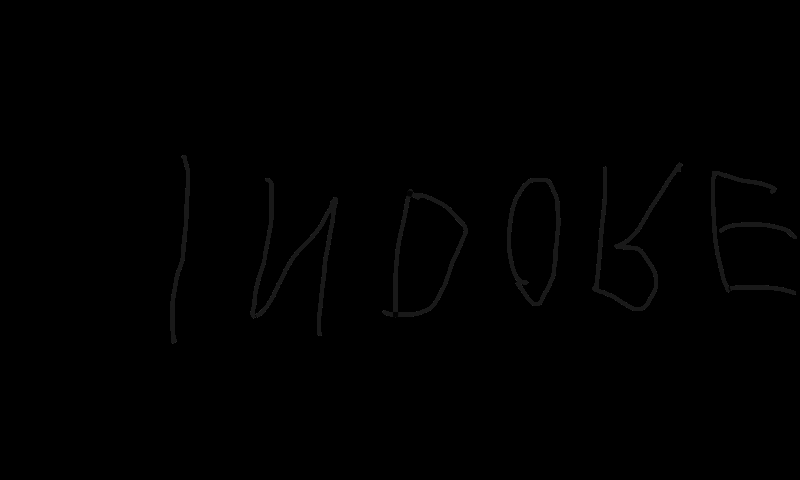

In [11]:
img1=convert(Image{Gray},imgsep1)

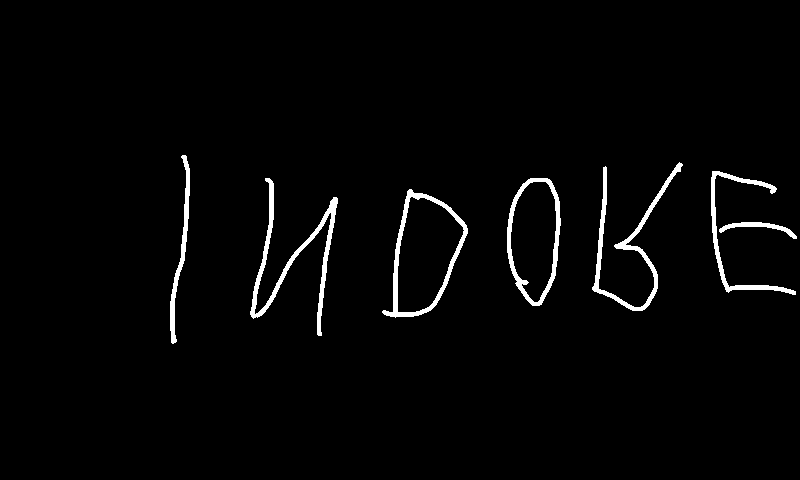

In [12]:
# Or, even better for clustering
A[A.>0]=1
imgsep1.data=A
img1=convert(Image{Gray},imgsep1)

In [13]:
# Creating the data points
X=Array(Int,2,sum(A.==1))

2x8780 Array{Int64,2}:
   1507664  454176784  454176840  …  0  0  0  0  0  0  0  0  0  0  0  0
 452410384          0  454176888     0  0  0  0  0  0  0  0  0  0  0  0

In [15]:
ind=find(A.==1)
for i=1:length(ind)
    X[:,i]=collect(ind2sub(A,ind[i]))
end
X=map(Float64,X)

2x8780 Array{Float64,2}:
 183.0  184.0  185.0  186.0  182.0  …  174.0  175.0  176.0  173.0  174.0
 156.0  156.0  156.0  156.0  157.0     343.0  343.0  343.0  344.0  344.0

In [16]:
# Solve it
using Clustering

In [17]:
out=kmeans(X,6)

Clustering.KmeansResult{Float64}(2x6 Array{Float64,2}:
 181.271  732.618  431.764  580.406  295.108  413.15 
 251.477  226.839  220.898  247.599  257.855  293.922,[1,1,1,1,1,1,1,1,1,1  …  1,1,1,1,1,1,1,1,1,1],[9118.88,9123.34,9129.8,9138.26,8926.47,8928.93,8933.39,8939.84,8948.3,8958.76  …  8233.7,8222.16,8212.62,8462.37,8444.83,8429.29,8415.75,8404.21,8628.88,8613.34],[876,1761,767,2729,1906,741],[876.0,1761.0,767.0,2729.0,1906.0,741.0],2.4156720478001036e7,15,true)

For plotting we use the function from the 
[K-means Algorithm](L09 K-means Algorithm.ipynb) notebook.

In [18]:
# Color it
function plotKmeansresult(out::KmeansResult,X::Array)
    p=FramedPlot()
    # Custers
    k=size(out.centers,2)
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(out.assignments.==j)],
        X[2,find(out.assignments.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    # Means
    p2=Points(out.centers[1,:],out.centers[2,:],
    color="red",symbolkind="plus")
    add(p,p2)
end

plotKmeansresult (generic function with 1 method)

In [20]:
using Winston

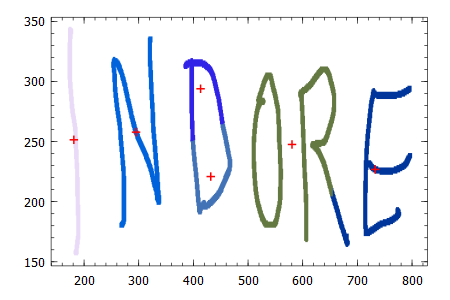

In [21]:
plotKmeansresult(out,X)

Now we try the spectral $k$-partitioning. We:

* form the Laplacian matrix, 
* compute eigenvectors corresponding to $k$ smallest eigenvalues, and
* cluster those vectors with $k$-means algorithm.

In [22]:
function plotKpartresult(C::Vector,X::Array)
    p=FramedPlot()
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(C.==j)],
        X[2,find(C.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    p
end

plotKpartresult (generic function with 1 method)

In [23]:
# Normalized Laplacian matrix
function normalized(L::Matrix)
    D=1.0./sqrt(diag(L))
    n=length(D)
    Ln=map(Float64,Symmetric([L[i,j]*D[i]*D[j] for i=1:n,j=1:n]))
    # Set diagonal exactly to 1
    for i=1:n
        Ln[i,i]=1.0
    end
    Ln  
end

normalized (generic function with 1 method)

In [24]:
using Distances
S=pairwise(SqEuclidean(),X)
# S=pairwise(Cityblock(),X)
β=1

1

In [25]:
# Weight matrix
W=exp(-β*S)
# Sum of weights
D=vec(sum(W,2))
# Laplacian matrix
L=diagm(D)-W
# Normalized Laplacian matrix
Ln=normalized(L)

8780x8780 Array{Float64,2}:
  1.0          -0.297331     -0.0148032    …   0.0           0.0        
 -0.297331      1.0          -0.25568          0.0           0.0        
 -0.0148032    -0.25568       1.0              0.0           0.0        
 -0.000115989  -0.0148029    -0.297324         0.0           0.0        
 -0.128317     -0.00549362   -3.70157e-5       0.0           0.0        
 -0.256394     -0.0811091    -0.00403818   …   0.0           0.0        
 -0.0904931    -0.211528     -0.0778166        0.0           0.0        
 -0.00450498   -0.0778096    -0.211508         0.0           0.0        
 -3.15852e-5   -0.004031     -0.0809647        0.0           0.0        
 -3.89101e-8   -3.66928e-5   -0.00544569       0.0           0.0        
 -0.00638751   -0.000273467  -1.8426e-6    …   0.0           0.0        
 -0.0127418    -0.00403082   -0.000200683      0.0           0.0        
 -0.00447838   -0.0104682    -0.00385103       0.0           0.0        
  ⋮                    

λ = [3.6822537277880693e-16,4.0064213164097973e-16,4.083149425351094e-16,4.294582954633746e-16,4.3111758289510595e-16,4.492465919768935e-16]


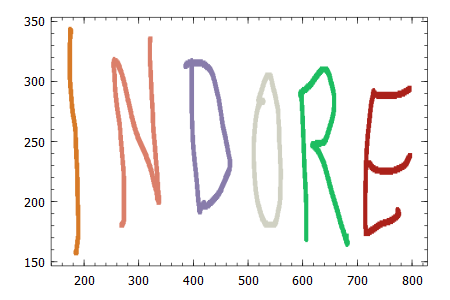

In [26]:
# Normalized Laplacian
k=6
m=size(L,1)
λ,Y=eigs(Ln,nev=k,which=:SM, v0=ones(m))
@show λ
Y=diagm(1.0./sqrt(D))*Y
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)